In [1]:
# setup
from mlwpy import *
%matplotlib inline

In [2]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,
                            diabetes.target, 
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs, 
 diabetes_train_tgt,  diabetes_test_tgt) = tts

In [3]:
diabetes_df = pd.DataFrame(diabetes.data, 
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

age                  sex                  bmi  \
0               0.0381               0.0507               0.0617   
1              -0.0019              -0.0446              -0.0515   
2               0.0853               0.0507               0.0445   
3              -0.0891              -0.0446              -0.0116   
4               0.0054              -0.0446              -0.0364   

                    bp                   s1                   s2  \
0               0.0219              -0.0442              -0.0348   
1              -0.0263              -0.0084              -0.0192   
2              -0.0057              -0.0456              -0.0342   
3              -0.0367               0.0122               0.0250   
4               0.0219               0.0039               0.0156   

                    s3                   s4                   s5  \
0              -0.0434              -0.0026               0.0199   
1               0.0744              -0.0395              -0.0683   
2              -0.0324              -0.0026               0.0029   
3              -0.0360               0.0343               0.0227   
4               0.0081              -0.0026              -0.0320   

                    s6               target  
0              -0.0176             151.0000  
1              -0.0922              75.0000  
2              -0.0259             141.0000  
3              -0.0094             206.0000  
4              -0.0466             135.0000

D:\Programs\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programs\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


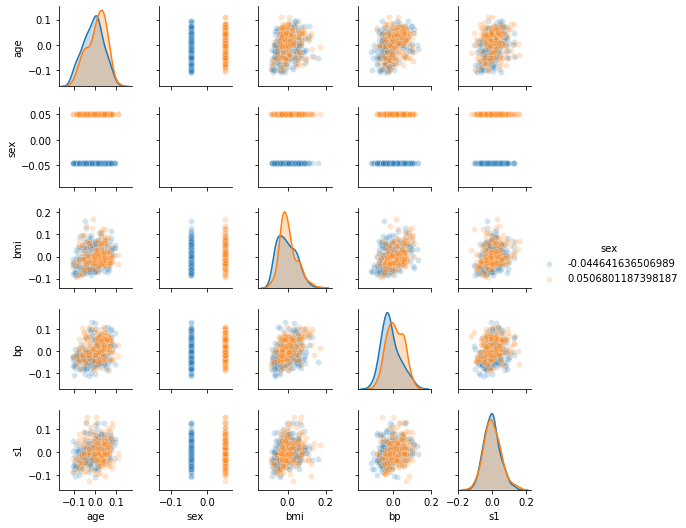

In [4]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']], 
             height=1.5, hue='sex', plot_kws={'alpha':.2});

In [5]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values), 
      np.median(values))

values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier), 
      np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [6]:
distances = np.array([4.0, 2.0, 2.0])
closeness = 1.0 / distances              # element-by-element division
weights = closeness / np.sum(closeness)  # normalize sum to one
weights

array([0.2, 0.4, 0.4])

In [7]:
values = np.array([4,6,8])

mean = np.mean(values)
wgt_mean = np.dot(values, weights)

print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 6.4


In [8]:
knn   = neighbors.KNeighborsRegressor(n_neighbors=3)
fit   = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

In [9]:
np.sqrt(3500)

59.16079783099616

In [10]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

In [11]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [12]:
# our data is very simple:  two (x,y) points
D = np.array([[3,5],
              [4,2]])

# we'll take x as our "input" and y as our "output"
x,y = D[:,0], D[:,1]

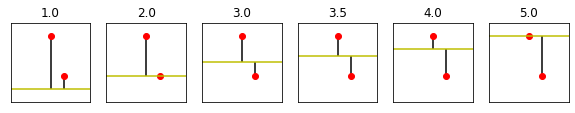

In [13]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])

results = []
fig, axes = plt.subplots(1,6,figsize=(10,5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0,6))
    ax.set_title(str(h_line))
    
    # plot the data
    ax.plot(x,y, 'ro')
    
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%    

    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line 
    ax.vlines(x, predictions, y)
    
    # calculate the error amounts and their sum-of-squares
    errors = y - predictions
    sse = np.dot(errors, errors)

    
    # put together some results in a tuple
    results.append((predictions, 
                    errors, errors.sum(), 
                    sse, np.sqrt(sse)))

In [14]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results, 
                                  columns=col_labels, 
                                  index="Prediction"))

Errors                  Sum                  SSE  \
Prediction                                                          
1.0000       [4.0, 1.0]               5.0000              17.0000   
2.0000       [3.0, 0.0]               3.0000               9.0000   
3.0000      [2.0, -1.0]               1.0000               5.0000   
3.5000      [1.5, -1.5]               0.0000               4.5000   
4.0000      [1.0, -2.0]              -1.0000               5.0000   
5.0000      [0.0, -3.0]              -3.0000               9.0000   

                       Distance  
Prediction                       
1.0000                   4.1231  
2.0000                   3.0000  
3.0000                   2.2361  
3.5000                   2.1213  
4.0000                   2.2361  
5.0000                   3.0000

In [15]:
def process(D, model, ax):
    # make some useful abbreviations/names
    # y is our "actual"
    x, y = D[:,0], D[:,1] 
    m, b = model
    
    # styling
    axis_helper(ax, (0,8))

    # plot the data
    ax.plot(x,y,'ro')

    # plot the prediction line
    helper_xs = np.array([0,8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color='y')
    
    # plot the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    
    # calculate error amounts
    errors = y - predictions
    
    # tuple up the results
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))

Raw Errors  Sum  SSE              TotDist
0    [2, -2]    0    8               2.8284
1    [1, -3]   -2   10               3.1623
2    [0, -4]   -4   16               4.0000
3    [0, -2]   -2    4               2.0000
4     [0, 0]    0    0               0.0000

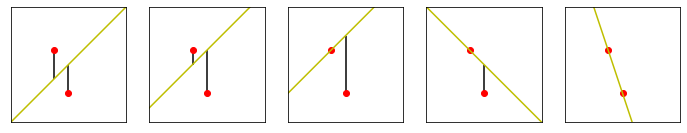

In [16]:
# our data is very simple:  two (x,y) points
D = np.array([[3,5],
              [4,2]])

#                      m   b  --> predictions = mx + b
lines_mb = np.array([[ 1,  0],
                     [ 1,  1],
                     [ 1,  2],
                     [-1,  8],
                     [-3, 14]])

col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []

# note: plotting occurs in process()
fig, axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D, mod, ax) for mod,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

In [17]:
lr    = linear_model.LinearRegression()
fit   = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the unseen testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

2848.295307932944

In [18]:
tgt = np.array([3,5,8,10,12,15])

In [19]:
# random guesses with| some constraints
num_guesses = 10
results = []
for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_dist = np.sum((tgt - guess)**2)
    results.append((total_dist, guess))
best_guess = sorted(results)[0][1]
best_guess

8.228074784134693

In [20]:
# use a random choice to take a hypothetical 
# step up or down:  follow it, if it is an improvement
num_steps = 100
step_size = .05

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)

for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1, -1]) * step_size)
    new_dist = np.sum((tgt - new_guess)**2)
    if new_dist < best_dist:
        best_guess, best_dist = new_guess, new_dist
print(best_guess)

8.836959712695537


In [21]:
# hypothetically take both steps (up and down)
# choose the better of the two.
# if it is an improvement, follow that step
num_steps = 1000
step_size = .02

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)
print("start:", best_guess)
for s in range(num_steps):
    # np.newaxis is needed to align the minus
    guesses = best_guess + (np.array([-1, 1]) * step_size)
    dists   = np.sum((tgt[:,np.newaxis] - guesses)**2, axis=0)
    
    better_idx = np.argmin(dists)

    if dists[better_idx] > best_dist:
        break
    
    best_guess = guesses[better_idx]
    best_dist  = dists[better_idx]
print("  end:", best_guess)

start: 9.575662598977047
  end: 8.835662598977063


In [22]:
print("mean:", np.mean(tgt))

mean: 8.833333333333334


In [23]:
# stand alone code
from sklearn import (datasets, neighbors, 
                     model_selection as skms,
                     linear_model, metrics)

diabetes = datasets.load_diabetes()
tts =  skms.train_test_split(diabetes.data,
                             diabetes.target, 
                             test_size=.25)
(diabetes_train, diabetes_test, 
 diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg' : linear_model.LinearRegression()}

for name, model in models.items():
    fit   = model.fit(diabetes_train, diabetes_train_tgt)
    preds = fit.predict(diabetes_test)

    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 54.85
linreg : 46.95


In [24]:
!cat scripts/perf_02.py

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
!python scripts/perf_02.py mem lr
!python scripts/perf_02.py time lr

python: can't open file 'scripts/perf_02.py': [Errno 2] No such file or directory
python: can't open file 'scripts/perf_02.py': [Errno 2] No such file or directory


In [26]:
!python scripts/perf_02.py mem knn
!python scripts/perf_02.py time knn

python: can't open file 'scripts/perf_02.py': [Errno 2] No such file or directory
python: can't open file 'scripts/perf_02.py': [Errno 2] No such file or directory
